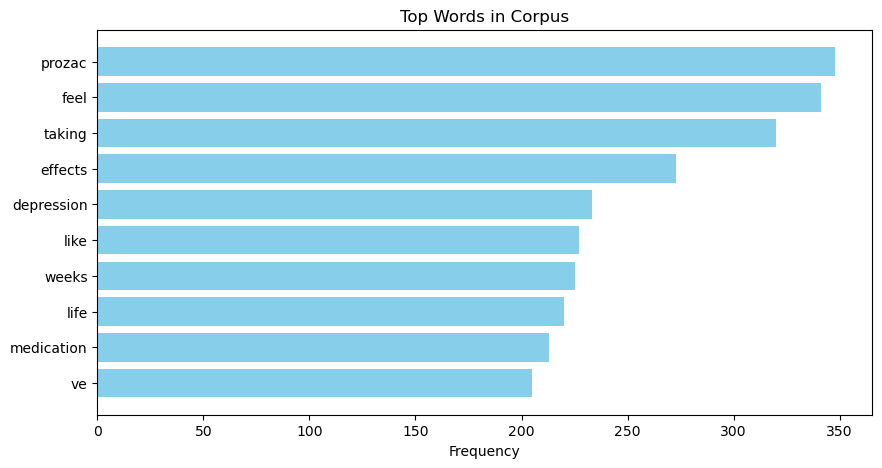

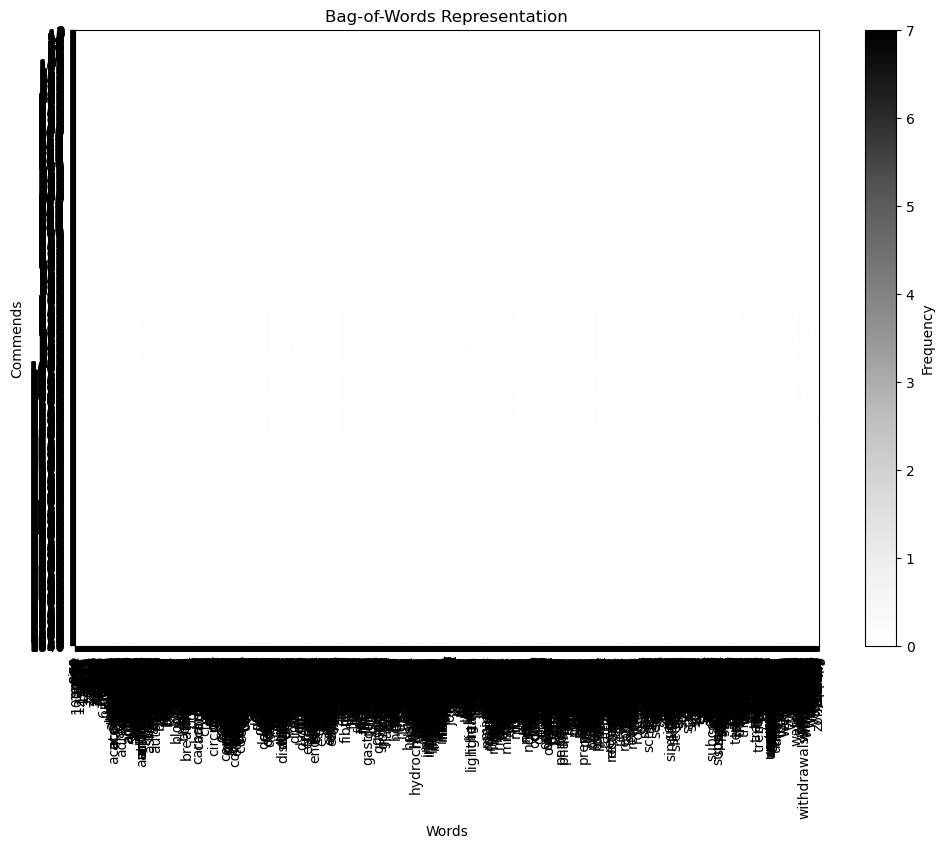

/Users/madhujachenthilraj/tools/ide/anaconda3/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/var/folders/nc/wzcx5nqj5_90ldc0gtygdvph0000gn/T/ipykernel_36612/2436520981.py:54: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_agglo = linkage(distances, method='ward')


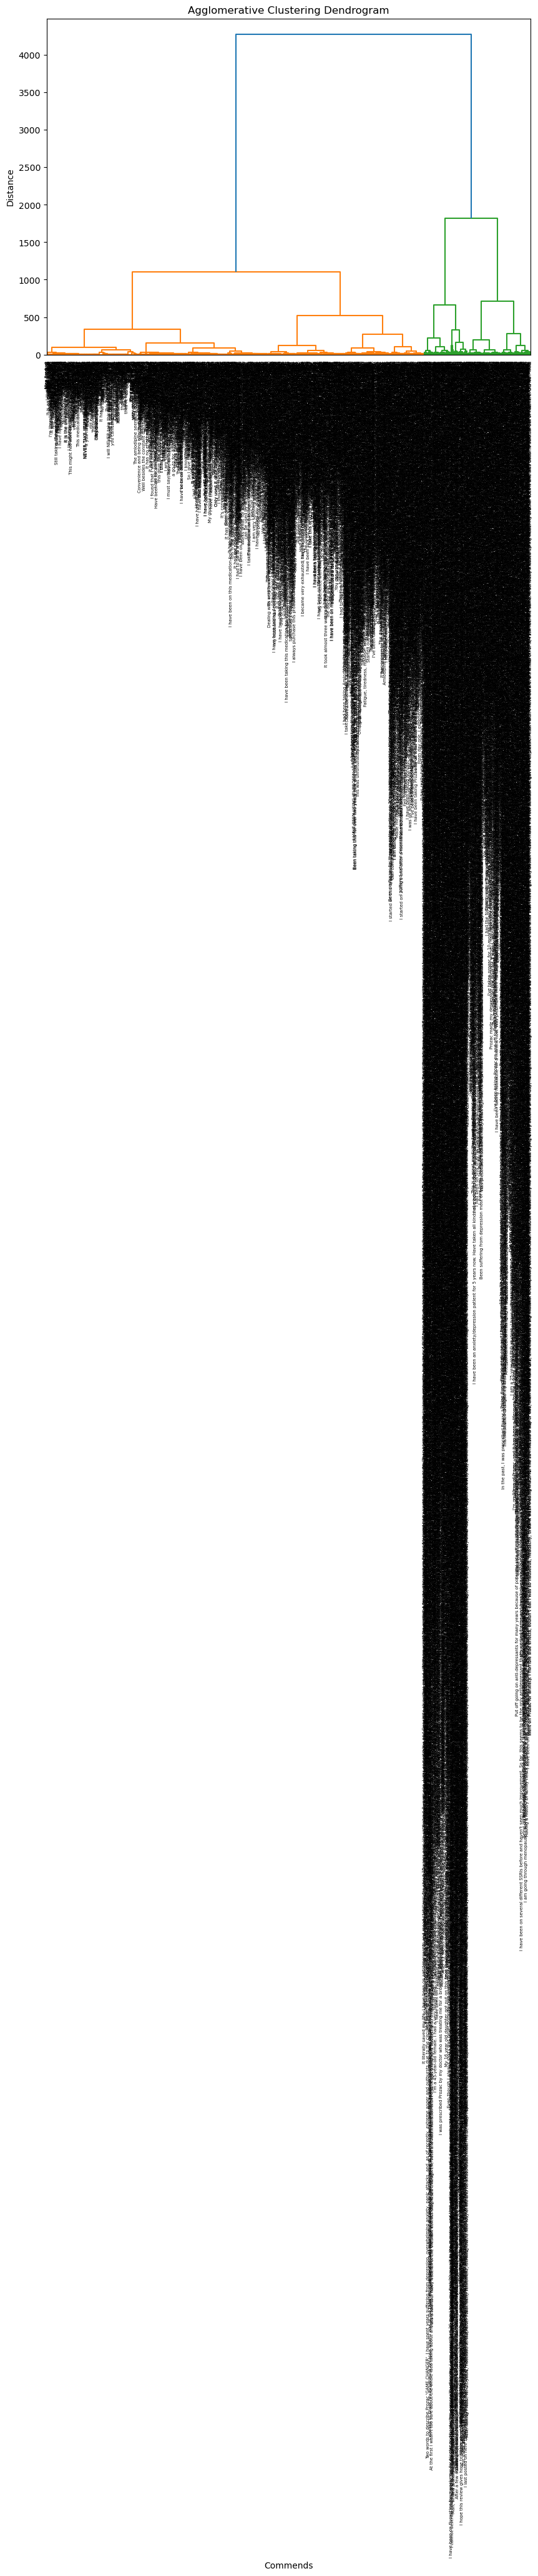

/var/folders/nc/wzcx5nqj5_90ldc0gtygdvph0000gn/T/ipykernel_36612/2436520981.py:64: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_hierarchical = linkage(distances, method='ward')


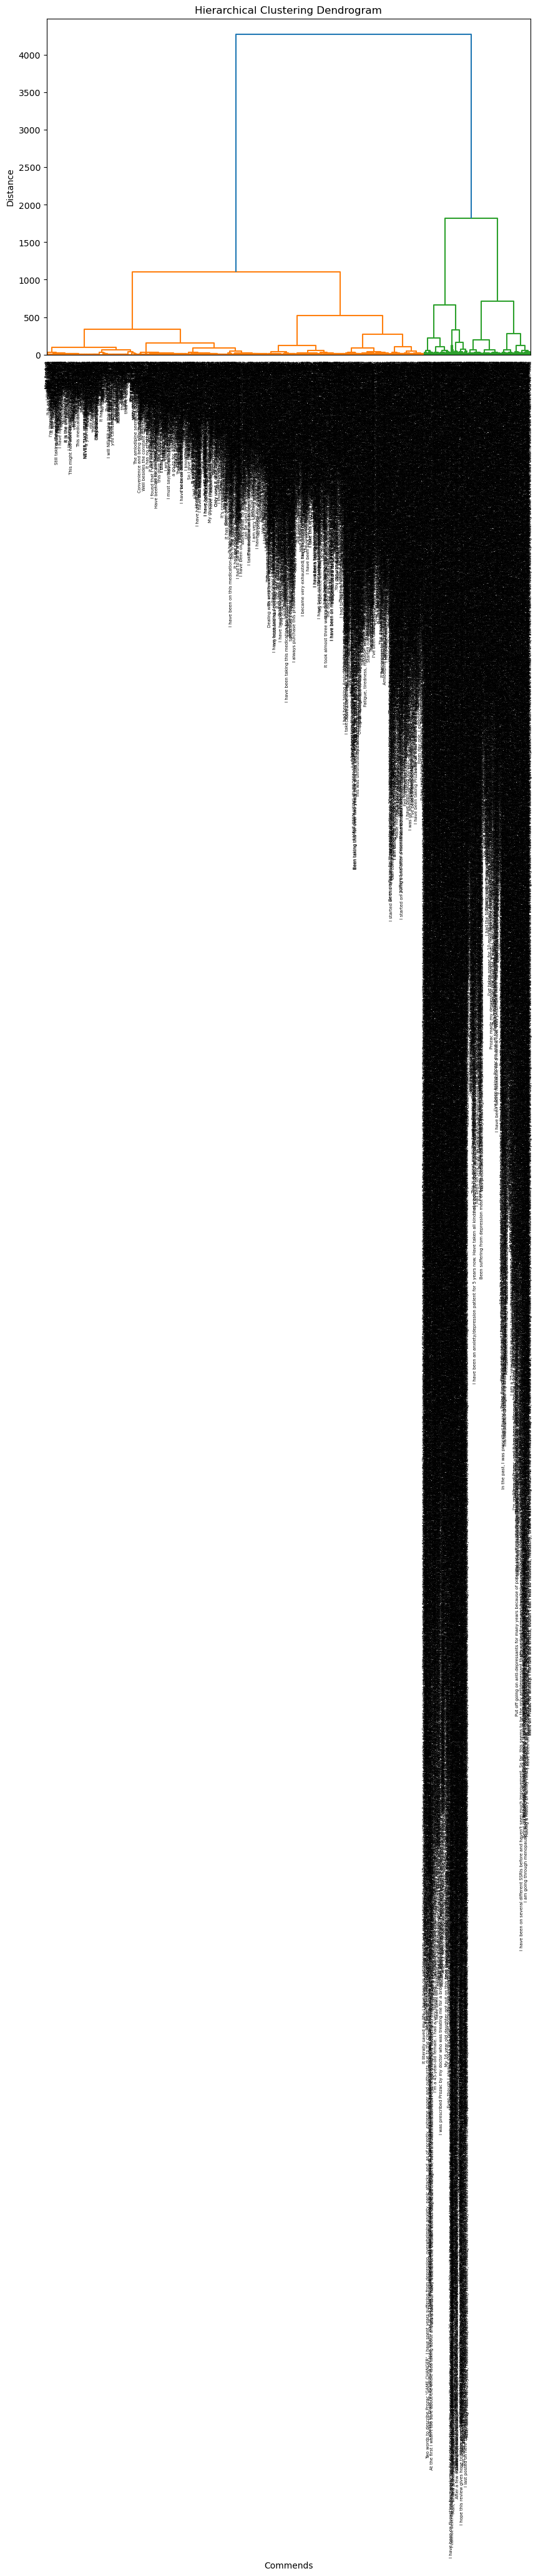

                                                Commend  agglo_cluster  \
0     I am an MD, and I have about 300 diabetic pati...            791   
1     This stuff was poison to my body. Over time I ...           1069   
2                                             Excellent             61   
3     I'm a type 2 diabetic. I was prescribed and be...           1106   
4     I feel better, but now they have to deal tst t...            436   
...                                                 ...            ...   
1836  It was very effective for me on a variety of d...            150   
1837                                helped releive pain             83   
1838  its faster than paracetamol. maybe im used to ...            317   
1839  Ibuprofen works very well for treating menstru...            273   
1840  i still hurt after taking ibuprofen. i need so...            509   

      hierarchical_cluster  
0                      791  
1                     1069  
2                       

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Step 1: Load your data from Excel file
df = pd.read_excel('/Users/madhujachenthilraj/Downloads/Conventional_medicine_final.xlsx')  # Replace with your Excel file path
# Assuming your comments are in a column named 'Commend'
comments = df['Commend']  # Replace 'Commend' with your actual column name

# Step 2: Create a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# Step 3: Compute the distance matrix
distances = pairwise_distances(X.toarray(), metric='euclidean')

# --- Top Words Visualization ---
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'word': words, 'count': word_counts})
top_words = top_words.sort_values(by='count', ascending=False).head(10)

# Plot top words
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top Words in Corpus')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()

# --- Bag-of-Words Visualization ---
# Convert bag-of-words to DataFrame for better visualization
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(12, 8))
plt.imshow(bag_of_words_df, cmap='Greys', aspect='auto')
plt.colorbar(label='Frequency')
plt.title('Bag-of-Words Representation')
plt.xlabel('Words')
plt.ylabel('Commends')
plt.xticks(ticks=np.arange(len(bag_of_words_df.columns)), labels=bag_of_words_df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(bag_of_words_df)), labels=df.index)
plt.show()

# --- Agglomerative Clustering ---
# Step 4: Perform Agglomerative Clustering
agglo_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglo_model.fit(distances)

# Step 5: Plot Dendrogram for Agglomerative Clustering
linkage_matrix_agglo = linkage(distances, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_agglo, labels=comments.values, leaf_rotation=90)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Commends')
plt.ylabel('Distance')
plt.show()

# --- Hierarchical Clustering ---
# Step 6: Perform Hierarchical Clustering and plot dendrogram
linkage_matrix_hierarchical = linkage(distances, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_hierarchical, labels=comments.values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Commends')
plt.ylabel('Distance')
plt.show()

# Optional: Cut the dendrogram to form flat clusters
max_d = 5  # Adjust this threshold based on your dendrogram
clusters_agglo = fcluster(linkage_matrix_agglo, max_d, criterion='distance')
clusters_hierarchical = fcluster(linkage_matrix_hierarchical, max_d, criterion='distance')

# Adding the cluster labels to the DataFrame
df['agglo_cluster'] = clusters_agglo
df['hierarchical_cluster'] = clusters_hierarchical

# Print out the commends with their corresponding cluster labels
print(df[['Commend', 'agglo_cluster', 'hierarchical_cluster']])
